1.  K means clustering takes into consideration a centroid value of a given dataset
2.  centroids distances checked with all data points
3.  2 centroid - c1 , c2 ---- (d1,d2,d3,d4,d5,d6) , c1d1 = 4.56 , c2d1 = 5.96
4.  d1 entering c1 and centroid value of c1 is now changed
5.  c1d2 = 5.25 ,c2d2 = 1.29 
6.  d2 will enter c2 and centroid value of c2 will change
7.  euclidean distance is checked


In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(data = [[12,95],[10,86],[9,75],[11,98],[5,45],[6,59],[4,28]],columns=['Hours Studied','Marks'])

In [3]:
df.head()

,Hours Studied,Marks
0,12,95
1,10,86
2,9,75
3,11,98
4,5,45


In [4]:
#taking the centroid values randomly
c1 = df.iloc[0]
c2 = df.iloc[1]

In [5]:
c1.head()

Hours Studied    12
Marks            95
Name: 0, dtype: int64

In [6]:
c2.head()

Hours Studied    10
Marks            86
Name: 1, dtype: int64

In [7]:
#finding euclidean distance
import numpy as np
c1 = np.array([c1])
c2 = np.array([c2])

In [8]:
# datapoint selection
d1 = np.array([df.iloc[2]])

In [9]:
d1

array([[ 9, 75]], dtype=int64)

In [10]:
sum_sq_c1 = np.sum(np.square(d1-c1))
sum_sq_c2 = np.sum(np.square(d1-c2))
ed_c1d1 = np.sqrt(sum_sq_c1)
ed_c2d1 = np.sqrt(sum_sq_c2)
print(f"the euclidean distance between c1 and d1 is {ed_c1d1}")
print(f"the euclidean distance between c2 and d1 is {ed_c2d1}")


the euclidean distance between c1 and d1 is 20.223748416156685
the euclidean distance between c2 and d1 is 11.045361017187261


In [11]:
from sklearn.metrics.pairwise import euclidean_distances

In [12]:
ed_c1d1_sklearn = euclidean_distances(d1,c1)
ed_c2d1_sklearn = euclidean_distances(d1,c2)
print(f"the sklearn method euclidean distance between c1 and d1 is {ed_c1d1_sklearn}")
print(f"the sklearn method euclidean distance between c2 and d1 is {ed_c2d1_sklearn}")

the sklearn method euclidean distance between c1 and d1 is [[20.22374842]]
the sklearn method euclidean distance between c2 and d1 is [[11.04536102]]


In [13]:
c1

array([[12, 95]], dtype=int64)

In [14]:
c2

array([[10, 86]], dtype=int64)

In [15]:
d1

array([[ 9, 75]], dtype=int64)

In [16]:
# 10, 86 / 9,75 --- [9.5,80.5]
c2 = (c2+d1)/2
c2

array([[ 9.5, 80.5]])

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

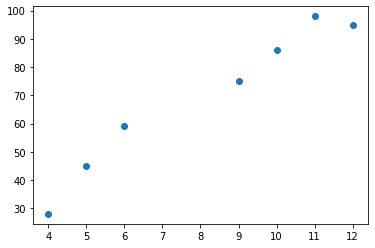

In [19]:
plt.scatter(df['Hours Studied'],df['Marks'])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [21]:
df

array([[1.        , 0.95714286],
       [0.75      , 0.82857143],
       [0.625     , 0.67142857],
       [0.875     , 1.        ],
       [0.125     , 0.24285714],
       [0.25      , 0.44285714],
       [0.        , 0.        ]])

In [22]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [23]:
ypred = km.fit_predict(df)

d:\Anaconda\envs\github1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
ypred

array([0, 0, 0, 0, 1, 1, 1])

In [25]:
df = pd.DataFrame(df)

In [27]:
df['cluster'] = ypred

In [28]:
df

,0,1,cluster
0,1.000,0.957143,0
1,0.750,0.828571,0
2,0.625,0.671429,0
3,0.875,1.000000,0
4,0.125,0.242857,1
5,0.250,0.442857,1
6,0.000,0.000000,1
